This notebook was redacted by Sergi Costa sergi.costa.dilme@upc.edu and supervised by Eduardo Prieto eduardo.prieto-araujo@upc.edu

# BEFORE STARTING

近年来，数据科学、机器学习、深度学习以及所有与数据相关的学科都越来越受欢迎。它们无疑是非常有用的工具，可以极大地提高每个人的生活质量，并用于解决人类在未来几十年面临的挑战，如[可持续发展目标](https://undocs.org/A/RES/71/313) *(UN, 2017)*，然而这项技术也带来了一些严重的问题，如隐私、安全和大规模监控

正如Frances Haugen所披露的那样，像Facebook （https://www.youtube.com/watch?v=GoSPmqqKams&ab_channel=WallStreetJournal）这样的大型科技和大数据公司一再遇到自己的利益与我们的安全之间的冲突（例如错误信息、仇恨内容和同意使用个人数据进行实验），并始终如一地解决这些冲突，以有利于自己的利益。(另见：*(Kramer, 2014)*， Facebook发表在PNAS上的一篇论文，*（Verma, 2014)*，一篇关于知情同意的社论表达，以及*(Flick, 2015)*，关于知情同意和Facebook的情绪操纵实践）

（斯威尼，1997）当她成功地利用选民登记簿提取马萨诸塞州州长威廉·维尔德的医疗记录时，她揭露并警告了即使在匿名数据上也存在至关重要的隐私保护问题。在智能电网中，没有医疗记录，但是侵犯隐私与电力消耗有关，这决定了我们现在的生活方式，并为我们去哪里、什么时候在家、使用哪些电器留下了一个开放的窗口*(Yassine, 2020)*……

为了保护隐私，除了要求政府进行适当的监管外，关键是要事先彻底考虑我们收集什么、如何收集以及收集多少数据来构建我们的模型
例如*(Majidpour等人，2016)*使用2个数据集预测电动汽车（EV）的充电负荷：来自客户档案的充电记录和车站记录的测量。第一个数据集损害了客户的隐私，而第二个数据集更好地保护了客户的隐私，因为它**不包含任何关于特定客户的信息**。然而，他们发现两种模型的预测误差在统计学上没有显著差异，这意味着两种数据集同样有用。

但是，危险不仅仅止于模型，还包括模型的解释和使用方式，例如，在2019冠状病毒病危机期间，开发了许多模型，但它们似乎没有帮助，如[麻省理工学院技术评论]（https://www.technologyreview.com/2021/07/30/1030329/machine-learning-ai-failed-covid-hospital-diagnosis-pandemic/）和*(Wynants等人，2020)*
由于算法通常是黑盒子，没有人能真正理解算法为什么会做出这样的决定。这一点，再加上[人类不以概率的方式思考](https://youtu.be/fCUTX1jurJ4？T =644)，这使得理解我们训练和使用的模型的局限性以及我们如何解释它们的结果和预测变得至关重要
此外，我们创建的模型可能（也可能会）被公司和威权政府用于监控和数据贩运，从而损害隐私权。*谁可以获得社会住房？，哪些产品根本没有展示，这对你的选择自由有何影响？警察在哪里巡逻？在申请医疗保险时，你会有多大的不平等
请记住，有针对性的广告需要有针对性的监控，正如我们所看到的，这种监控甚至不需要关键数据就能有效。

## WHAT IS MACHINE LEARNING AND DATA SCIENCE?

- **Machine learning** is the study of computer algorithms that can learn a task through experience (usually data) without having been coded for the task itself. 

- The most usual tasks (also referred as problems) are **classification** and **regression**.


- The learning can mainly be **supervised**, this is using labeled data as the experience, **unsupervised**, that uses unlabeled data. However, you may also find other approaches such as **semi-supervised learning** (using both labeled and unlabeled data) or **reinforcement learning** (using a reward/penalty system).


- Machine Learning is a discipline in **Data Science**, which is the field that aims to extract knowledge from data.


- **Deep Learning** is a part of Machine Learning based on *artificial neural networks* with multiple layers.



### FUNDAMENTAL PYTHON LIBRARIES

The following are the most popular toolboxes used in data science and machine learning applications on Python and their import statement conventions. Some of them will be fundamental for this project, others won't but may come useful on your career:

- [numpy](https://numpy.org/): provides with array manipulation tools and useful mathematical functions.
        import numpy as np

- [scipy](https://scipy.org/): provides with algorithms and statistics toolboxes.
        import scipy as sc

- [pandas](https://pandas.pydata.org/): provides the main data management interface.
        import pandas as pd

- [datetime](https://docs.python.org/3/library/datetime.html): provides with the tools to generate and operate with time related data and time series.
        import datetime

- [statsmodels](https://www.statsmodels.org/stable/index.html): provides with useful tools for statistical analysis.
        import statsmodels.api as sm

- [scikit-learn](https://scikit-learn.org/stable/index.html): alongside with statsmodels, this module provides with tools to build statistical models.
        from sklearn import linear_model #tree, ensemble, neural_network ...
        from sklearn.model_selection import train_test_split
        from sklearn.metrics import mean_squared_error, r2_score # etc

- [pickle](https://docs.python.org/3/library/pickle.html): will allow us to load and save models.
        import pickle		

- [matplotlib](https://matplotlib.org/) & [seaborn](https://seaborn.pydata.org/): provides with plotting and graphic visualization tools.
        import matplotlib.pyplot as plt
        import seaborn as sns        

- [tensorflow](https://www.tensorflow.org/) & [tensorflow datasets](https://www.tensorflow.org/datasets): Tools ready for machine learning and deep learning using neural networks.
        import tensorflow as tf
        import keras as kr
        import tensorflow_datasets as tfds

# OBJECTIVES

Build a data-driven model to predict the most relevant harmonics distribution on a real transformer 24 hours ahead.
The data provided represents the measured voltages at different harmonics frequencies, THD and current from a real **400 kV transformer** for a period of 3 months, which makes this a time-series problem.

- What is a time-series dataset? _It is a series of points indexed in time order_ (from [Wikipedia](https://en.wikipedia.org/wiki/Time_series))

The following plot is an example of a time-series ([source](https://elifesciences.org/articles/32822#fig1)):
<img src="https://iiif.elifesciences.org/lax/32822%2Felife-32822-fig1-v3.tif/full/1500,/0/default.jpg" alt="time-series" width="600"/>


What is the difference between a *First principle* and a *Data driven* model?:
- First principle: Parameters based on theoretical work and experimental data.
- Data driven: Parameters based on observed correlations and statistical methods.

## PROJECT TASKS

It is generally advised to break down any project into smaller tasks.

The following cyclic template is proposed in *Brownlee (2016)*, however you may modify it as you please or use a different one that suits you better.


In [ ]:
# Python Project Template

# 1. Prepare Problem
# a) Load libraries
# b) Load dataset

# 2. Summarize Data
# a) Descriptive statistics
# b) Data visualizations

# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

# 4. Evaluate Algorithms
# a) Split-out validation dataset
# b) Test options and evaluation metric
# c) Spot Check Algorithms
# d) Compare Algorithms

# 5. Improve Accuracy
# a) Algorithm Tuning
# b) Ensembles

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use

## 1. PREPARE PROBLEM

### 1.a. LOAD LIBRARIES

In [ ]:
import numpy as np # matrix operations
import pandas as pd # data management
import statsmodels.api as sm # statistical analysis
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting

import datetime
weekend = ['Saturday', 'Sunday']

# pandas display options
pd.options.display.float_format = '{:,.4f}'.format
pd.set_option('display.width', 84)
pd.set_option('display.max_columns', 10)

# plot display options
plt.rcParams ['figure.figsize'] = [15 , 6]
plt.rcParams.update({'font.size': 11})
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

### 1.b. LOAD DATASET

Take a look at your data before loading it to python so you have an insight on it to better manage with the `read` methods. In this case we can see:
- Format: `.csv` file
- Delimiter: `;`, decimal: `,`
- First row: column names
- First column: date and time
- Void columns at the end
- 54 non-void columns: timestamp, harmonics (from 0 to 50), THD, current h1 
- 14760 rows: every 10 minutes. This makes it *6 samples/hour · 24 hours/day = 144 samples/day*
 


|(i)  |TIME        |HARMONICS 0|HARMONICS 1|HARMONICS 2 ... 50       |THD|CURRENT H1  |
|:----|:-----------|:----------|:----------|:------------------------|:--|:-----------|
|     |Time        |u12h0 [V]  |u12h1 [V]  |u12h2 [%] ... u12h50 [%] |THD|Strom_h1 [A]|
|0    |2018-06-06 2018-06-06 19:30:00.000000 |In [kV]    |In [kV]    | In [%]                 |In [%]|In [A]      |
|...  |Every 10 min |...       |...       |...                     |...|...         |
|14759|17.09.2018 2018-09-17 07:20:00.000.000 |In [kV]    |In [kV]    | In [%]                 |In [%]|Last: NaN  |

In [3]:
filename = "Data/data_harm.csv"

# Create a date parser to automatically convert the 'Time' column from string to datetime
df_date_parser = lambda x: datetime.datetime.strptime(x[-27:30].strip(), '%Y-%m-%d %H:%M:%S')

# Read the dataset
df = pd.read_csv(filename, delimiter=";", decimal=",", \
                 parse_dates=['Time'], date_parser=df_date_parser) # Read 'Time' values as datetime

# Locate and clear void "Unnamed" columns
df = df.loc[:, ~df.columns.str.contains('^Unnamed')] 

# Set the 'Time' column as the dataframe index, which is more adequate for a time series dataframe
df = df.set_index('Time')

print("Dataframe loaded")

Dataframe loaded


In [4]:
# Peek at the data
print('Dataframe dimensions:', df.shape)
df.head(5)

Dataframe dimensions: (14760, 53)


,u12h0 [V],u12h1 [V],u12h2 [%],u12h3 [%],u12h4 [%],...,u12h48 [%],u12h49 [%],u12h50 [%],THD,Strom_h1 [A]
Time,,,,,,,,,,,
2018-06-06 19:30:00,0.6435,403.9992,0.0935,0.0836,0.0308,...,0.0055,0.0115,0.0059,0.5161,169.7832
2018-06-06 19:40:00,0.5567,405.7369,0.0077,0.0759,0.0099,...,0.0053,0.0117,0.0055,0.4976,174.2704
2018-06-06 19:50:00,0.5914,405.6870,0.0086,0.0736,0.0095,...,0.0053,0.0135,0.0053,0.5055,176.9157
2018-06-06 20:00:00,0.5881,405.8885,0.0080,0.0744,0.0096,...,0.0054,0.0137,0.0053,0.5071,176.0912
2018-06-06 20:10:00,0.5572,406.1021,0.0070,0.0769,0.0082,...,0.0060,0.0216,0.0055,0.4965,175.9906


## 2. DATA SUMMARY

Before attempting to build any model, it is crucial to understand how the data is being worked with behaves and
what describes. 

This will give us a better insight of what model/algorithm to use and what results we can expect
from it.

### 2.a. DESCRIPTIVE STATISTICS

A basic statistic synthesis can be obtained using the `describe()` method:

In [5]:
df['u12h1 [V]'].describe()

count   14,760.0000
mean       406.2904
std          2.1277
min        397.7831
25%        404.9032
50%        406.4357
75%        407.7898
max        412.1541
Name: u12h1 [V], dtype: float64

You can also calculate the confidence interval for the mean using the [t-student distribution](https://www.tdistributiontable.com/):

$ \qquad SEM = \dfrac{s}{\sqrt{n}} \quad \Rightarrow \quad CI:[\mu\pm t \cdot SEM]$

You can also compute the t-Student distribution using the scipy library. Import the `stats` package with `from scipy import stats` and then use the `t` function `t_ci95 = stats.t.ppf(0.975, df=N-1)`

In [6]:
mu = df['u12h1 [V]'].mean()
sem = df['u12h1 [V]'].sem()
ci95 = [mu -1.960*sem , mu +1.960*sem]
print ('Mean confidence interval (95%) :')
print(ci95)

Mean confidence interval (95%) :
[406.25609108299216, 406.3247418261135]


Columns’ datatypes can also be checked with `.dtypes`. In this case all of them are `float64`, which matches what we know about the dataset:

In [7]:
df.dtypes

u12h0 [V]       float64
u12h1 [V]       float64
u12h2 [%]       float64
u12h3 [%]       float64
u12h4 [%]       float64
u12h5 [%]       float64
u12h6 [%]       float64
u12h7 [%]       float64
u12h8 [%]       float64
u12h9 [%]       float64
u12h10 [%]      float64
u12h11 [%]      float64
u12h12 [%]      float64
u12h13 [%]      float64
u12h14 [%]      float64
u12h15 [%]      float64
u12h16 [%]      float64
u12h17 [%]      float64
u12h18 [%]      float64
u12h19 [%]      float64
u12h20 [%]      float64
u12h21 [%]      float64
u12h22 [%]      float64
u12h23 [%]      float64
u12h24 [%]      float64
u12h25 [%]      float64
u12h26 [%]      float64
u12h27 [%]      float64
u12h28 [%]      float64
u12h29 [%]      float64
u12h30 [%]      float64
u12h31 [%]      float64
u12h32 [%]      float64
u12h33 [%]      float64
u12h34 [%]      float64
u12h35 [%]      float64
u12h36 [%]      float64
u12h37 [%]      float64
u12h38 [%]      float64
u12h39 [%]      float64
u12h40 [%]      float64
u12h41 [%]      

### 2.b. DATA VISUALIZATIONS

The Matplotlib and Seaborn packages have plenty of tools to plot data so it is highly advised to check the documentation and look for some examples.

Always keep in mind that a chart must be informative. You may find useful to follow the principles proposed in *(Skiena, 2017, Chapter 6.2)*:
- Maximize data-ink ratio: visualizations should focus on showing the data and let it talk for itself. When visualizing data less can be more, so void non-descriptive stuff such as shadows or 3D renders.


- Minimize the lie factor: Avoid misleading techniques such as distortions of scale, not showing the variance or eliminating labels from axes.


- Minimize chartjunk: Remove elements from plots rather than adding them (e.g: remove or lighten the grid so it does not imprison the data)


- Use proper scales and clear labeling: For example scaling the axes over the full theoretical range or just over the observed values range will have a huge impact on your visualization.


- Make effective use of colour: Colours are a key part on graphical communication so use mnemonics as much as possible (e.g. blue/red for negative/positive values). Also keep in mind some scales are much better/worse for colour-blind people!


- Exploit the power of repetition: Arrays of plots facilitate comparisons.

You may also find interesting and funny the [Data is ugly](https://www.reddit.com/r/dataisugly/) subreddit

Following is an example of a time plot visualization of our data:

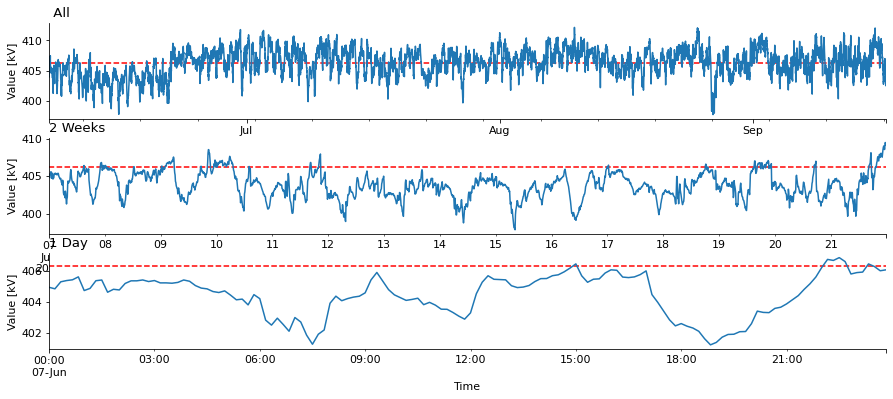

In [8]:
voltage = df.loc[: ,'u12h1 [V]']
v_mean = df['u12h1 [V]'].mean()

plt.subplot(3 ,1 ,1)
plt.title(" All", loc ='left')
plt.ylabel('Value [kV]')
ax1 = voltage.plot () # Voltage visualization
ax1.hlines (y=v_mean , xmin=df.head(1).index.date , xmax=df.tail(1).index.date, color='r', ls='--')

plt.subplot(3 ,1 ,2)
plt.title("2 Weeks", loc='left')
plt.ylabel('Value [kV]')
ax2 = voltage.loc['2018 -06 -07':'2018 -06 -21'].plot() # Voltage visualization (2 weeks)
ax2.hlines(y=v_mean , xmin=df.head(1).index.date, xmax=df.tail(1).index.date, color='r', ls='--')

plt.subplot(3 ,1 ,3)
plt.title ("1 Day", loc='left')
plt.ylabel('Value [kV]')
ax3 = voltage.loc['2018 -06 -07'].plot() # Voltage visualization (1 Day)
ax3.hlines(y=v_mean, xmin=df.head(1).index.date, xmax=df.tail(1).index.date, color='r', ls='--')

plt.show()

Using the Seaborn package it is easier to plot stratified variables. 

In this example data is stratified by labour days and weekend (`hue`) and a confidence interval of 95% is given (`ci`)

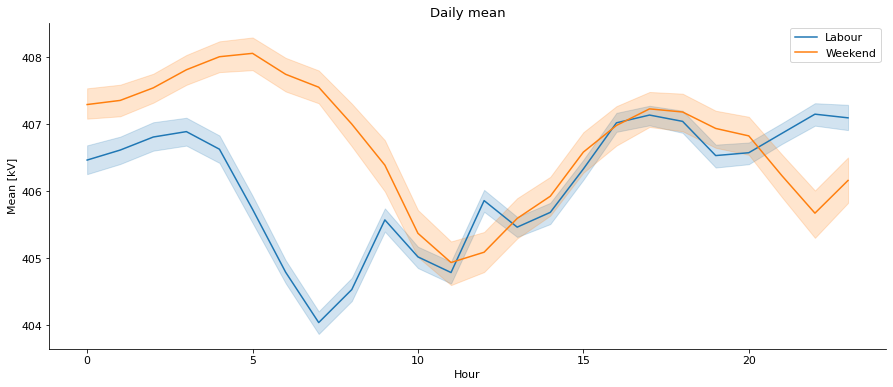

In [9]:
plt.title("Daily mean")

sns.lineplot(data=voltage, x=voltage.index.hour, y=voltage, \
            hue=voltage.index.day_name().isin(weekend), ci=95)
plt.legend(loc='upper right', labels=['Labour', 'Weekend'])
plt.xlabel('Hour')
plt.ylabel('Mean [kV]')
plt.show()

To have a better understanding of the feature behaviour we can use the `boxplot` tool

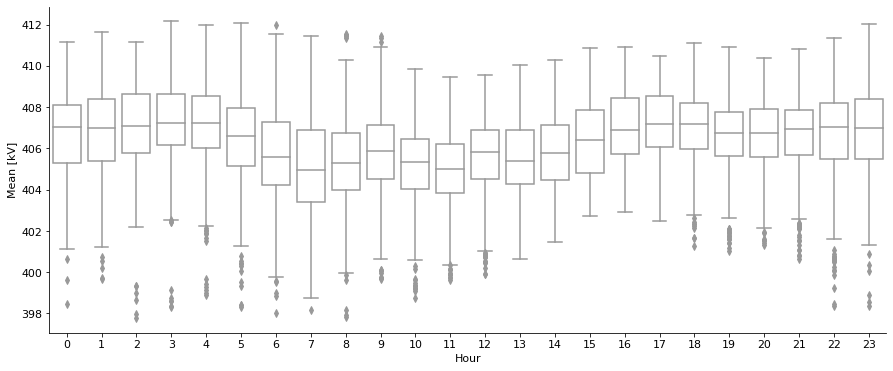

In [10]:
sns.boxplot(x=voltage.index.hour, y=voltage, color='White')
plt.xlabel('Hour')
plt.ylabel('Mean [kV]')
plt.show()

Antoher interesting tool is the 2D visualization. This will give us a glimpse on possible daily patterns.

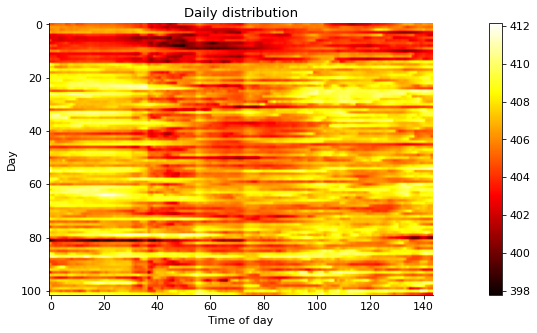

In [11]:
n_days = int(voltage.shape[0]/144) # 144 samples/day
voltage_1D = np.array(voltage.iloc[27:-45]) # remove incomplete days (first and last)
voltage_2D = voltage_1D.reshape(n_days, 144) # Reshape data to a 2D matrix stratified by days

plt.figure(figsize=(20,5))
plt.imshow(voltage_2D, cmap='hot')
plt.title("Daily distribution")
plt.xlabel('Time of day')
plt.ylabel('Day')
plt.colorbar()
plt.show()

When working with time series related variables (i.e: lagged values), **autocorrelation** comes really handy to make decisions. It can be easily plotted using the Statsmodels api

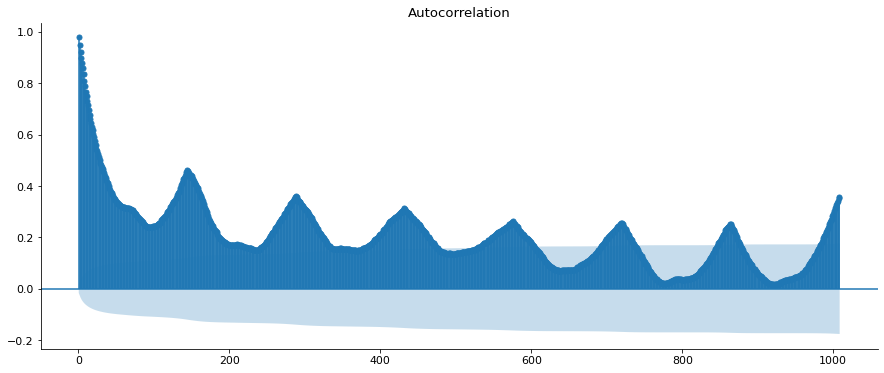

array([1.        , 0.97830112, 0.94736962, ..., 0.34341074, 0.35277911,
       0.35798975])

In [12]:
# Autocorrelation plot
sm.graphics.tsa.plot_acf( voltage, lags=144*7, zero=False) # 144 samples/day
plt.title("Autocorrelation")
plt.show()

sm.tsa.acf(voltage, nlags=144*7, fft=False) # autocorrelation values

## 3. PREPARE THE DATA

Let's create a copy of the `df` to work with it while having an unmodified version.

In [13]:
df_clean = df.copy(deep=True)

### 3.a. DATA CLEANING

**Find missing values**

In [14]:
print("Total missing values:", df_clean.isnull().sum().sum())

# Hihglight missing values in red
df_clean.loc[df_clean.isnull().sum(axis=1)>0].style.highlight_null(null_color='red')

Total missing values: 1


,u12h0 [V],u12h1 [V],u12h2 [%],u12h3 [%],u12h4 [%],u12h5 [%],u12h6 [%],u12h7 [%],u12h8 [%],u12h9 [%],u12h10 [%],u12h11 [%],u12h12 [%],u12h13 [%],u12h14 [%],u12h15 [%],u12h16 [%],u12h17 [%],u12h18 [%],u12h19 [%],u12h20 [%],u12h21 [%],u12h22 [%],u12h23 [%],u12h24 [%],u12h25 [%],u12h26 [%],u12h27 [%],u12h28 [%],u12h29 [%],u12h30 [%],u12h31 [%],u12h32 [%],u12h33 [%],u12h34 [%],u12h35 [%],u12h36 [%],u12h37 [%],u12h38 [%],u12h39 [%],u12h40 [%],u12h41 [%],u12h42 [%],u12h43 [%],u12h44 [%],u12h45 [%],u12h46 [%],u12h47 [%],u12h48 [%],u12h49 [%],u12h50 [%],THD,Strom_h1 [A]
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-09-17 07:20:00,-0.149407,403.460693,0.007802,0.070722,0.009792,0.428661,0.007866,0.343771,0.015977,0.021782,0.014757,0.097725,0.006243,0.085519,0.006036,0.006603,0.005278,0.014700,0.005360,0.014331,0.006070,0.008127,0.005393,0.032347,0.005133,0.033237,0.005609,0.007043,0.005709,0.010380,0.005234,0.009660,0.005596,0.006174,0.005069,0.009710,0.005147,0.015916,0.005709,0.005232,0.005045,0.015478,0.005090,0.005250,0.005976,0.005034,0.005216,0.013016,0.005080,0.009426,0.006148,0.573992,nan


**Fill missing values**

There is multiple ways to deal with them and it is crucial to use the most adequate one for each element:

- Drop the missing values `df.dropna()`: Easiest method and fine if we have enough training data, but we lose information, specially in time-series when using lagged values as features.


- Impute the missing values `df.fillna()` (or `SimpleImputer` from `sklearn.impute`):
    - Zero: Easy but usually wrong
    - Arbitrary number (-1, 9999 or string): Use a number far away enough from the mean. Beware that it will distort the original distribution.
    - Random value (from the column): Permits to evaluate the impact of imputation.  
    - Heuristic-based: Guess based on self knowledge on the domain.
    - Mean (expected value): Leaves the mean unchanged but it is not appropiate if the reason for the missing data is systematic.
    - Median.
    - $\mu \pm 3\sigma$ (End-of-tail imputation).
    - Mode (most frequent category): for categorical variables.
    - Nearest neighbour.
    - Interpolation: Use linear regression to predict the missing values.
    
    
*(Amr, 2020, Chapter 4), (Skiena, 2017, Chapter 3.3.3), (Galli, 2020, Chapter 2)*

In [15]:
df_clean.fillna(df_clean.mean(), inplace=True) #inplace=True -> replaces data in original df

print("Total missing values:", df_clean.isnull().sum().sum())
df_clean.loc['2018-09-17 07:20:00':]

Total missing values: 0


,u12h0 [V],u12h1 [V],u12h2 [%],u12h3 [%],u12h4 [%],...,u12h48 [%],u12h49 [%],u12h50 [%],THD,Strom_h1 [A]
Time,,,,,,,,,,,
2018-09-17 07:20:00,-0.1494,403.4607,0.0078,0.0707,0.0098,...,0.0051,0.0094,0.0061,0.5740,115.0372


**Outliers**

Outliers are extreme values, significaly different from the rest of the data. Since they may negatively impact the performance of our models, it is interesting to localize them and remove or modify them.

Usual outlier boundaries are:

- $\mu \pm 3\sigma$. If normally distributed, approximately 99% of the data will be between those limits


- $\text{Q}_{25\% \text{ // } 75\%}\pm1.5\times\text{IQR}$


- $\text{Q}_{5\%}$ and $\text{Q}_{95\%}$

*(Galli, 2020, Chapter 1 & 6)*

In [16]:
# Identifying outliers (comment/uncomment those to use)

# Using mean and std dev
# mean = df_clean.mean()
# std = df_clean.std()
# lower_boundary = mean - 3*std
# upper_boundary = mean + 3*std

# Using IQR
# IQR = df_clean.quantile(0.75) - df_clean.quantile(0.25)
# lower_boundary = df_clean.quantile(0.25) - (1.5*IQR)
# upper_boundary = df_clean.quantile(0.75) + (1.5*IQR)

# Using Q5th and Q95th
lower_boundary = df_clean.quantile(0.05)
upper_boundary = df_clean.quantile(0.95)

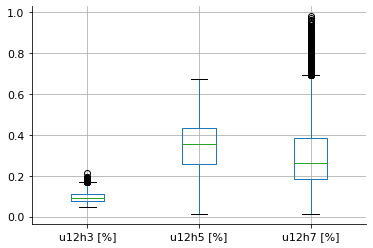

402.61772305000005 409.55555576499995


,u12h0 [V],u12h1 [V],u12h2 [%],u12h3 [%],u12h4 [%],...,u12h48 [%],u12h49 [%],u12h50 [%],THD,Strom_h1 [A]
Time,,,,,,,,,,,
2018-06-07 06:20:00,0.1553,402.5196,0.0069,0.0795,0.0075,...,0.0050,0.0138,0.0053,0.4674,175.5589
2018-06-07 06:40:00,0.1834,402.5605,0.0075,0.0729,0.0082,...,0.0052,0.0140,0.0055,0.4890,182.0677
2018-06-07 06:50:00,0.1904,402.1273,0.0071,0.0735,0.0079,...,0.0053,0.0112,0.0055,0.4860,187.0464
2018-06-07 07:20:00,0.2329,401.8741,0.0059,0.0676,0.0081,...,0.0051,0.0074,0.0051,0.5194,192.1183
2018-06-07 07:30:00,0.2246,401.2903,0.0057,0.0637,0.0084,...,0.0053,0.0087,0.0055,0.5305,194.9658
...,...,...,...,...,...,...,...,...,...,...,...
2018-09-16 10:20:00,-0.0984,409.8345,0.0076,0.1283,0.0109,...,0.0056,0.0067,0.0051,1.0046,13.6769
2018-09-16 10:30:00,-0.0928,409.7033,0.0077,0.1261,0.0105,...,0.0058,0.0060,0.0047,0.9991,11.9611
2018-09-16 16:50:00,0.2095,409.8262,0.0097,0.1406,0.0086,...,0.0051,0.0062,0.0052,0.4540,34.3184


In [17]:
# Visualize outliers

# In a boxplot:
plt.figure(figsize=(6,4))
df_clean.boxplot(column=['u12h3 [%]','u12h5 [%]','u12h7 [%]'])
plt.show()


# In dataframe:
column='u12h1 [V]'

outliers = np.where(df_clean[column] > upper_boundary[column], True, \
                    np.where(df_clean[column] < lower_boundary[column], True, \
                            False))

print(lower_boundary[column], upper_boundary[column])
df_clean.loc[(outliers)]

As well as for missing values there is multiple ways to deal with outliers:

- **Removing (Trimming)**: Just removing the data. This approach is not suitable for time series!


- **Winsorizing**: Replacing the extreme values to a value closer to the mean, for example the defined boundaries.


- **Zero-coding**: Capping the lower variable at zero. Used in applications where variables can't take negative values.


*(Galli, 2020, Chapter 6)*

In [18]:
# outliers management

columns=['u12h1 [V]'] # columns to winsorize

df_clean_winsorized = df_clean.copy(deep=True)

for c in columns:
    winsorized_column = np.where(df_clean[c] > upper_boundary[c], upper_boundary[c], \
                                 np.where(df_clean[c] < lower_boundary[c], lower_boundary[c], \
                                  df_clean[c]))

    df_clean_winsorized[c] = winsorized_column

# df_clean = df_clean_winsorized.copy(deep=True) # overwrite the dataframe    
    
df_clean_winsorized

,u12h0 [V],u12h1 [V],u12h2 [%],u12h3 [%],u12h4 [%],...,u12h48 [%],u12h49 [%],u12h50 [%],THD,Strom_h1 [A]
Time,,,,,,,,,,,
2018-06-06 19:30:00,0.6435,403.9992,0.0935,0.0836,0.0308,...,0.0055,0.0115,0.0059,0.5161,169.7832
2018-06-06 19:40:00,0.5567,405.7369,0.0077,0.0759,0.0099,...,0.0053,0.0117,0.0055,0.4976,174.2704
2018-06-06 19:50:00,0.5914,405.6870,0.0086,0.0736,0.0095,...,0.0053,0.0135,0.0053,0.5055,176.9157
2018-06-06 20:00:00,0.5881,405.8885,0.0080,0.0744,0.0096,...,0.0054,0.0137,0.0053,0.5071,176.0912
2018-06-06 20:10:00,0.5572,406.1021,0.0070,0.0769,0.0082,...,0.0060,0.0216,0.0055,0.4965,175.9906
...,...,...,...,...,...,...,...,...,...,...,...
2018-09-17 06:40:00,-0.1509,405.3862,0.0076,0.0841,0.0093,...,0.0055,0.0083,0.0052,0.5218,141.7934
2018-09-17 06:50:00,-0.1500,405.0507,0.0079,0.0834,0.0095,...,0.0052,0.0077,0.0051,0.5493,143.5668
2018-09-17 07:00:00,-0.1539,404.5786,0.0066,0.0801,0.0096,...,0.0054,0.0059,0.0058,0.5643,149.1656


**Harmonics**

It is important to notice that harmonics are in [%] of the first harmonic value for each sample. In order to compare and operate with them an extra feature for each harmonic $k$ must be generated such as follows:

$$ U_{k,i} = \dfrac{u_{k,i}}{100}\cdot U_{1,i}$$

with $U_{k,i}$ representing the value of the harmonic $k$ at timestamp $i$ in [kV], $u_{k,i}$ same in [%] (i.e: values from the column `u12hk [%]`) and $U_{1,i}$ the first harmonic value in [kV] (i.e: values from the column `u12h1 [kV]`).

In [19]:
for col in df_clean.loc[:,'u12h2 [%]':'u12h50 [%]']:
    df_clean[col[:-2]+'V]'] = df_clean[col]/100 * df_clean.loc[:, 'u12h1 [V]']
df_clean.head(5)

,u12h0 [V],u12h1 [V],u12h2 [%],u12h3 [%],u12h4 [%],...,u12h46 [V],u12h47 [V],u12h48 [V],u12h49 [V],u12h50 [V]
Time,,,,,,,,,,,
2018-06-06 19:30:00,0.6435,403.9992,0.0935,0.0836,0.0308,...,0.0227,0.0410,0.0224,0.0464,0.0239
2018-06-06 19:40:00,0.5567,405.7369,0.0077,0.0759,0.0099,...,0.0230,0.0431,0.0216,0.0476,0.0222
2018-06-06 19:50:00,0.5914,405.6870,0.0086,0.0736,0.0095,...,0.0219,0.0373,0.0217,0.0547,0.0215
2018-06-06 20:00:00,0.5881,405.8885,0.0080,0.0744,0.0096,...,0.0215,0.0428,0.0218,0.0557,0.0216
2018-06-06 20:10:00,0.5572,406.1021,0.0070,0.0769,0.0082,...,0.0227,0.0424,0.0242,0.0876,0.0224


**Select relevant harmonics**

Although each harmonic on its own is relevant, it is interesting to see how the **spectrum** looks like. This can be achieved with a bar plot.

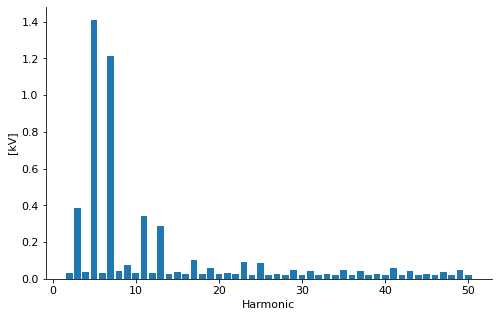

In [20]:
#Bar plot of the mean of each harmonic
plt.figure(figsize=(8,5))
plt.bar(np.arange(1,51)[1:], np.mean(df_clean.loc[:,'u12h2 [V]':'u12h50 [V]'])) 
plt.xlabel('Harmonic')
plt.ylabel('[kV]')
plt.show()

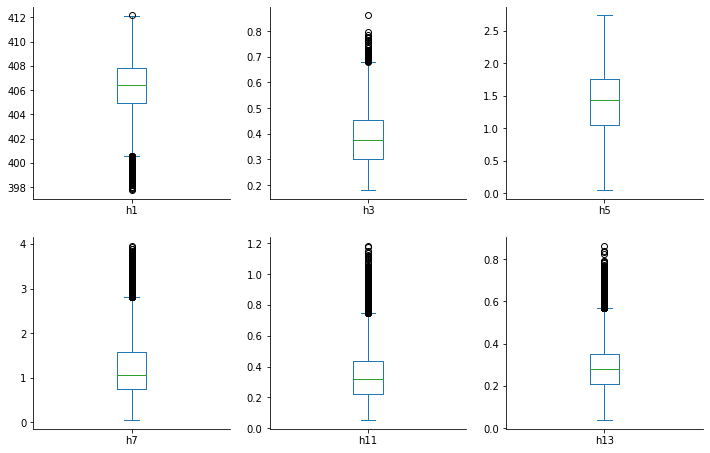

,h1,h3,h5,h7,h11,h13
count,"14,760.0000","14,760.0000","14,760.0000","14,760.0000","14,760.0000","14,760.0000"
mean,406.2904,0.3855,1.4096,1.2125,0.3441,0.2864
std,2.1277,0.1006,0.5074,0.6709,0.1628,0.1107
min,397.7831,0.1812,0.0550,0.0538,0.0518,0.0383
25%,404.9032,0.3016,1.0477,0.7417,0.2245,0.2091
50%,406.4357,0.3757,1.4438,1.0700,0.3201,0.2779
75%,407.7898,0.4535,1.7659,1.5691,0.4337,0.3526
max,412.1541,0.8611,2.7372,3.9621,1.1854,0.8641


In [21]:
# Choose only the harmonics that will be used
harmonics_columns_list = ['u12h1 [V]','u12h3 [V]','u12h5 [V]','u12h7 [V]','u12h11 [V]','u12h13 [V]']

# Create a new df that only contains the selection
df_clean_selection = df_clean.loc[:,harmonics_columns_list]

# Rename columns to make it easier to navigate
df_clean_selection.rename(columns={'u12h1 [V]':'h1', 'u12h3 [V]':'h3', \
                          'u12h5 [V]':'h5', 'u12h7 [V]':'h7', \
                          'u12h11 [V]':'h11', 'u12h13 [V]':'h13'}, inplace=True)

#or:
#harmonics.rename(columns = lambda x: x[3:-4], inplace=True)


# visualize
df_clean_selection.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, fontsize=10, figsize=(12,12))
plt.show()

df_clean_selection.describe()

**Create features**

In this example we will predict the **5th harmonic (h5)**, other harmonics will be used as features.

To create lagged features you can use `.shift()`. For example if you want a feature to be the *3rd harmonic lagged 144 samples* (which is equivalent to 1 day): `harmonic_df['h3_lag_144'] = df_clean_selection['h3'].shift(144)`

In [22]:
# Since we will be generating quite some features, let's create a new dataframe
harmonic_df = pd.DataFrame(df_clean_selection['h5'])
harmonic_df.columns = ['Target']
harmonic_df.head()

,Target
Time,
2018-06-06 19:30:00,1.3508
2018-06-06 19:40:00,1.3353
2018-06-06 19:50:00,1.3463
2018-06-06 20:00:00,1.3752
2018-06-06 20:10:00,1.3493


In [23]:
# LAGS
harmonic_df['lag_144'] = harmonic_df['Target'].shift(144) # 1 day
harmonic_df['lag_216'] = harmonic_df['Target'].shift(216) # 1.5 days
harmonic_df['lag_288'] = harmonic_df['Target'].shift(288) # 2 days
harmonic_df['lag_360'] = harmonic_df['Target'].shift(360) # 2.5 days

# HOUR OF DAY
harmonic_df['Hour'] = harmonic_df.index.hour

# DAY OF WEEK
harmonic_df['Day_week'] = harmonic_df.index.weekday # Monday=0, Sunday=6

# WEEKEND
harmonic_df['weekend'] = harmonic_df.index.day_name().isin(weekend)

# remove rows with nan values product of lagged features and create dataframes for features and target
X = harmonic_df.dropna().drop('Target', axis=1)
y = harmonic_df.dropna()['Target']
print(X, y)

                     lag_144  lag_216  lag_288  lag_360  Hour  Day_week  weekend
Time                                                                            
2018-06-09 07:30:00   1.8427   1.5120   1.9082   1.3508     7         5     True
2018-06-09 07:40:00   1.8688   1.4984   1.9354   1.3353     7         5     True
2018-06-09 07:50:00   1.9134   1.4918   1.9265   1.3463     7         5     True
2018-06-09 08:00:00   1.9093   1.5058   1.9337   1.3752     8         5     True
2018-06-09 08:10:00   1.9067   1.4784   2.0153   1.3493     8         5     True
...                      ...      ...      ...      ...   ...       ...      ...
2018-09-17 06:40:00   1.1778   1.0029   0.5090   1.3389     6         0    False
2018-09-17 06:50:00   1.1058   0.9883   0.5262   1.3415     6         0    False
2018-09-17 07:00:00   1.0405   1.1274   0.5281   1.3149     7         0    False
2018-09-17 07:10:00   1.0792   1.2270   0.6327   1.2763     7         0    False
2018-09-17 07:20:00   0.9593

### 3.b. FEATURE SELECTION

Irrelevant features in our model may decrease its performance, therefore it is interesting to select and remove features based on how much they contribute.

According to *(Brownlee, 2016)* there are 3 main benefits of performing feature selection before modeling:
- Reducing overfitting. (See 4.a)
- Improving accuracy.
- Reducing training time.

Check [Feature selection](https://scikit-learn.org/stable/modules/feature_selection.html) on Scikit-learn for further information.

**No justifiable relation with the target**

It is advised to remove any feature that is clearly not related to the target (even if they seem to correlate, see: *[spurious correlations](https://tylervigen.com/spurious-correlations)*), else we will obtain a weak model that will be greatly affected by noise.

**Correlation between features**

Linear models may achieve poor perfomances if our features are highly correlated. We are interested in high correlation to `Target` and low correlation between features.

As proposed in *(Skiena, 2017, Chapter 5.3)* we can threshold the pearson correlation coefficient effect sizes as:\
$\quad 
\begin{aligned}
    \cdot \pm 0.2 \; &\text{Small effect} \\
    \cdot \pm 0.5 \; &\text{Medium effect} \\
    \cdot \pm 0.8 \; &\text{Big effect}
\end{aligned}
$

          Target  lag_144  lag_216  lag_288  lag_360    Hour  Day_week  weekend
Target    1.0000   0.7016  -0.2017   0.4976  -0.2707  0.0984   -0.2717  -0.3243
lag_144   0.7016   1.0000  -0.1170   0.7051  -0.2078  0.0989   -0.1436  -0.2474
lag_216  -0.2017  -0.1170   1.0000  -0.1181   0.7073 -0.0424    0.0749  -0.0759
lag_288   0.4976   0.7051  -0.1181   1.0000  -0.1241  0.1012    0.2362   0.0694
lag_360  -0.2707  -0.2078   0.7073  -0.1241   1.0000 -0.0416    0.2473   0.1480
Hour      0.0984   0.0989  -0.0424   0.1012  -0.0416  1.0000    0.0042   0.0007
Day_week -0.2717  -0.1436   0.0749   0.2362   0.2473  0.0042    1.0000   0.7900
weekend  -0.3243  -0.2474  -0.0759   0.0694   0.1480  0.0007    0.7900   1.0000


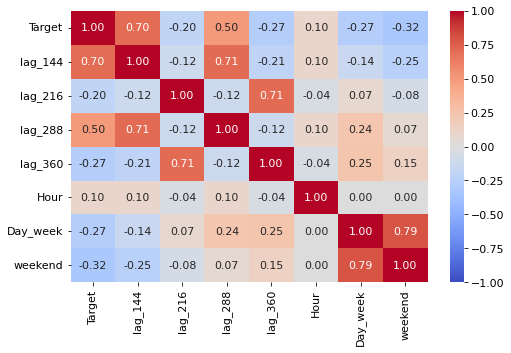

In [24]:
correlation = harmonic_df.corr(method='pearson')
print(correlation)

plt.figure(figsize=(8,5))
sns.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, \
            cmap='coolwarm', annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.show()

As we can see there is some correlation between features:
- `lag_144` and `lag_288`: we remove `lag_288` since it has the least correlation to `Target`.
- `lag_216` and `lag_360`: we remove `lag_216` since it has the least correlation to `Target`.
- `Day_week` and `weekend`: we remove `weekend` here since it has less information.

In [25]:
X = X.drop('lag_288', axis=1)
X = X.drop('lag_216', axis=1)
X = X.drop('weekend', axis=1)

X.head()

,lag_144,lag_360,Hour,Day_week
Time,,,,
2018-06-09 07:30:00,1.8427,1.3508,7,5
2018-06-09 07:40:00,1.8688,1.3353,7,5
2018-06-09 07:50:00,1.9134,1.3463,7,5
2018-06-09 08:00:00,1.9093,1.3752,8,5
2018-06-09 08:10:00,1.9067,1.3493,8,5


### 3.c. DATA TRANSFORMS

**Scaling**

In order to make the different features comparable it is a good practice to normalize them, this is homogenizing its scale. There is multiple ways to do it, however the most common scalers are:
- Standard scaler (standardization): tells us how many st.dev. ($s$) data deviates from the mean ($\mu$) $\quad z = \dfrac{x-\mu}{s}$
- Normalization: Centers data to 0 with range [-1, 1] $\quad z = \dfrac{x-\mu}{\max(x)-\min(x)}$
- Min/Max scaling: Range [0, 1] $\quad z = \dfrac{x-\min(x)}{\max(x)-\min(x)}$
- Maximum absolute scaling: Recommended for sparse data centered to 0 $\quad z = \dfrac{x}{\max(x)}$
- Robust scaling: Recommended for data with outliers $\quad z = \dfrac{x-\text{Median}(x)}{Q_3(x)-Q_1(x)}$

*(Amr, 2020, Chapter 4), (Galli, 2020, Chapter 8)*

In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X) # Calculate the scaler

print('Mean =', scaler.mean_)
print('Std.Dev =', scaler.scale_)

X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)
X_scaled.head()

Mean = [ 1.41027005  1.42066435 11.5         3.034375  ]
Std.Dev = [0.50642925 0.50311079 6.92218655 2.01604647]


,lag_144,lag_360,Hour,Day_week
Time,,,,
2018-06-09 07:30:00,0.8538,-0.1389,-0.6501,0.9750
2018-06-09 07:40:00,0.9053,-0.1696,-0.6501,0.9750
2018-06-09 07:50:00,0.9935,-0.1478,-0.6501,0.9750
2018-06-09 08:00:00,0.9853,-0.0904,-0.5056,0.9750
2018-06-09 08:10:00,0.9802,-0.1418,-0.5056,0.9750


## 4. EVALUATE ALGORITHMS

The objective of this section is to try, test and decide which algorithms may work better with your dataset before commiting to a definitve one.

In [27]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

### 4.a. DATASET SPLIT-OUT

In order to evaluate the model the first step is dividing the dataset into 3 subsets:

- **Training set**: Data we will use to train the model. Usually 60%-70% of the original dataset.


- **Test set**: Data we will use to evaluate how well the model generalizes (regularization, hyperameter configuration...). Usually 20%-30% of the original dataset.


- **Evaluation data (Validation set)**: Data we WON'T USE until the model is fully finished in order to confirm the final model's performance (i.e: we hold back some data to get an independent final idea on how good is our model). Usually 20% of the original dataset.

        It is essential to maintain the veil of ignorance over your evaluation data for as long as possible, 
        because you spoil it as soon as you use it. 
        Jokes are never funny the second time you hear them, after you already know the punchline.

|Training set | Test set | Validation set|
|:------------:|:---------:|:--------------:|
|60%|20%|20%|

\
When analyzing the model with the *test set* we usually see it does not work as well as we thought (Usually: $\text{Error }_{\text{train}} < \text{Error }_{\text{test}})$\

- A low performance on both *train set* and *test set* suggests the model suffers from **underfitting** or high bias.


- A relatively low performance on *test set* when compared to that on the *train set* suggests the model suffers from **overfitting** or high variance.\
Overfitting occurs when having to many features or not enough data. The model adjusts well to the *training data* but will not generalize to new examples. 

For a good visual explanation on bias and variance see [Machine Learning Fundamentals: Bias and Variance](https://www.youtube.com/watch?v=EuBBz3bI-aA&ab_channel=StatQuestwithJoshStarmer)

\
**(!)** Data should be **shuffled** before splitting the dataset.

**(!)** EXCEPT in **time series**, else we will obtain a better perfomance value than the actual one (i.e: we will be fooling ourselves) because we would have trained and tested it with "future" data.

*(Skiena, 2017, Chapter 7.5.1)*

In [28]:
# Split examples into train - test - evaluation sets
from sklearn.model_selection import train_test_split

train_size = 0.6 #60%
test_size = 0.2 #20%
eval_size = 0.2 #20%

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=(1-train_size), shuffle=False)
X_test, X_eval, y_test, y_eval = train_test_split(X_test, y_test, test_size=eval_size/(test_size + eval_size), shuffle=False) 

In [29]:
# Scale
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)
X_eval_scaled = pd.DataFrame(scaler.transform(X_eval), columns=X_eval.columns, index=X_eval.index)

### 4.b. TEST OPTIONS AND EVALUATION METRIC

In order to evaluate the performance of our models we need evaluation metrics. These will vary whether it is a regression or a classification problem.\
Since this case it is a regression case we may use:

- **Mean Absolute Error (MAE)**: Sum of the absolute differences between predicted and actual values. Gives an idea of the magnitude of the error but not on its direction.


- **Mean Squared Error (MSE)**: Squared differences between predicted and actual values


- **Root Mean Squared Error (RMSE)**: Taking the squared root from MSE we obtain a value with the same units as our target variable.


- $R^2$: Indicates, with a value of 0 to 1, how good is the fit. It tells us how much better predicted values are compared to using the mean as our predictor:
    - 0: Our model is *as good* as just using the mean value.
    - Negative: Our model is *worse* than using the mean value.
    - Positive: Our model offered additional value compared to the mean, which means is *better*.
    - 1: Our model have a perfect fit.

*(Brownlee, 2016, Chapter 10.3)*, *(Amr, 2020, Chapter 3)*

**Base model**

These metrics are to be used against models in order to compare their performances and choosing the best option.

A good base model is to use a dummy model that returns the average of the target regardless of the inputs, however there is multiple strategies. Scikit-learn's [DummyRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html) is a good tool to automatically generate the base model. 

**(!)** Using the mean as the strategy will give lower MSE compared to when using the median (same with MAE when using the median), therefore we want our model to beat the base model for both MAE and MSE.

*(Amr, 2020, Chapter 3)*

In [30]:
# Create and train the base model
from sklearn.dummy import DummyRegressor

base_model = DummyRegressor(strategy='mean')
base_model.fit(X_train_scaled, y_train)

y_pred_test_base = base_model.predict(X_test_scaled)

In [31]:
# Obtain metrics for the base model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('BASE MODEL METRICS')
print('Mean abosolute error (MAE): %.3f'
      % mean_absolute_error(y_test, y_pred_test_base))
print('Mean squared error (MSE): %.3f'
      % mean_squared_error(y_test, y_pred_test_base))
print('R2 score: %.3f'
      % r2_score(y_test, y_pred_test_base))

BASE MODEL METRICS
Mean abosolute error (MAE): 0.501
Mean squared error (MSE): 0.365
R2 score: -0.378


### 4.c. SPOT CHECK ALGORITHMS

In order to decide for an algorithm we can select a few (that we know may suite the regression problem in this case) and compare their performance using their default tuning parameters (and make sure they perfor better than the dummy model).

*(Brownlee, 2016, Chapter 20.6)*

In [32]:
# algorithms
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

models_list = []
models_list.append(('LR', LinearRegression()))
models_list.append(('Lasso', Lasso()))
models_list.append(('Ridge', Ridge()))
models_list.append(('ElasticNet', ElasticNet()))
models_list.append(('RT', DecisionTreeRegressor()))
models_list.append(('SVR', SVR()))


# You can also use Pipeline to include standardization in the algorithm
# from sklearn.pipeline import Pipeline
# models_list.append(('LR_s', Pipeline([ ('scaler', StandardScaler()), ('LR', LinearRegression())])))
# etc

Using cross validation we can produce a series of models from the same type with different training data from the training data set in order to get a mean and deviation of the obtained performance metrics. 

In cross validation we divide our training set into a number of folds, then train and test the model using all of the combinations of train/test data using those folds, thus obtaining multiple values for the performance metrics.

For a more in-depth explanation on how cross validation works you can check [Machine Learning Fundamentals: Cross Validation](https://www.youtube.com/watch?v=fSytzGwwBVw&ab_channel=StatQuestwithJoshStarmer) from the StatQuest Youtube channel

In [33]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

n_folds = 10
#seed = 5
scoring = 'neg_mean_squared_error'

results = []
names = []
for name, model in models_list:
    kfold = KFold(n_splits=n_folds, shuffle=False)
    cv_results = cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: -0.091294 (0.032084)
Lasso: -0.199542 (0.068121)
Ridge: -0.091294 (0.032082)
ElasticNet: -0.199542 (0.068121)
RT: -0.091617 (0.019294)
SVR: -0.063812 (0.027083)


Note from the [Scikit-learn documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter):

For the most common use cases, you can designate a scorer object with the ``scoring`` parameter [...]. All scorer objects follow the convention that **higher return values are better than lower return values**. Thus metrics which measure the distance between the model and the data, like ``metrics.mean_squared_error``, are available as ``neg_mean_squared_error`` which return the negated value of the metric.

### 4.d. COMPARE ALGORITHMS

By taking a look at the distributions of the scores obtained from the cross validation folds we can compare the models and make a decision on which ones we should take or drop. Remember that we are looking for low MSE i.e. high negative MSE values!

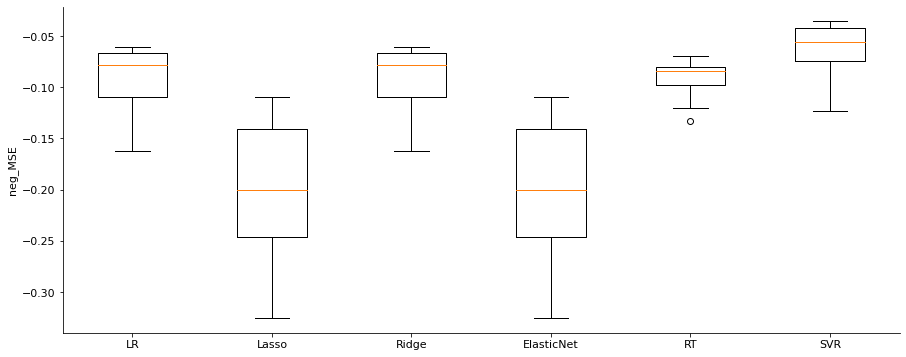

In [34]:
plt.boxplot(results)
plt.xticks(ticks=range(1,len(names)+1), labels=names)
plt.ylabel('neg_MSE')
plt.show()

## 5. IMPROVE ACCURACY

### 5.a. ALGORITHM TUNING

In order to get the best performance of the model we can try different configurations of the algorithm's hyperparameters.

The following tools from Scikit-learn will be useful here:
- [Randomized Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html?highlight=randomizedsearchcv#sklearn.model_selection.RandomizedSearchCV): Will try a selection of the values. Is faster than Grid Search but less accurate.
- [Grid Search](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearchcv#sklearn.model_selection.GridSearchCV): Will try all of the values, but takes more time than Randomized Search.

*(Brownlee, 2016, Chapter 20.6)*

In [35]:
# Random search to get an idea of the best ranges for the hyperparameters values

n_iter = 50

random_grid_dist = {'criterion': ['squared_error','friedman_mse','absolute_error','poisson'],
               'splitter': ['best', 'random'],
               'max_depth': [int(x) for x in np.linspace(5, 50, num=8)],
               'min_samples_split': [2, 4, 6, 8, 10],
               'min_samples_leaf': [1, 2, 4, 6, 8],
               'max_features': ['auto', 'sqrt', 'log2']}

n_folds = 10
seed = 42
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=n_folds, shuffle=False)

estimator = DecisionTreeRegressor() # model to tune

# Random search of parameters, using 10 fold cross validation, 
random_search = RandomizedSearchCV(estimator=estimator, param_distributions=random_grid_dist, scoring=scoring,\
                                   n_iter=n_iter, cv=kfold, verbose=2, random_state=seed, n_jobs = -1)
random_search.fit(X_train_scaled, y_train)
random_search.best_params_

Fitting 10 folds for each of 50 candidates, totalling 500 fits


{'splitter': 'best',
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 5,
 'criterion': 'squared_error'}

In [36]:
# Grid search to find the best values

estimator = DecisionTreeRegressor()

param_grid = {
    'splitter': ['best'],
    'min_samples_split': [8, 10, 12],
    'min_samples_leaf': [1,2],
    'max_features': ['auto'],
    'max_depth': [4,5,6],
    'criterion': ['squared_error']
    }

n_folds = 10
scoring = 'neg_mean_squared_error'
kfold = KFold(n_splits=n_folds, shuffle=False)

grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kfold, scoring=scoring, verbose=1)
grid_search.fit(X_train_scaled, y_train)

grid_search.best_params_

Fitting 10 folds for each of 18 candidates, totalling 180 fits


{'criterion': 'squared_error',
 'max_depth': 6,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 12,
 'splitter': 'best'}

In [37]:
# Display mean and std scores for each configuration

print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.068251 using {'criterion': 'squared_error', 'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 12, 'splitter': 'best'}
-0.074204 (0.020153) with: {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 8, 'splitter': 'best'}
-0.074204 (0.020153) with: {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
-0.074204 (0.020153) with: {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 12, 'splitter': 'best'}
-0.074204 (0.020153) with: {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 8, 'splitter': 'best'}
-0.074204 (0.020153) with: {'criterion': 'squared_error', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 10, 'splitter': 'best'}
-0.074204 (

In [38]:
# Choose the best model
model = grid_search.best_estimator_

In [39]:
# Try model on test set
y_pred_train = model.predict(X_train_scaled)
y_pred_test = model.predict(X_test_scaled)

print('BASE MODEL METRICS ON TEST SET')
print('Mean abosolute error (MAE): %.3f'
      % mean_absolute_error(y_test, y_pred_test_base))
print('Mean squared error (MSE): %.3f'
      % mean_squared_error(y_test, y_pred_test_base))
print('R2 score: %.3f'
      % r2_score(y_test, y_pred_test_base))

print()

print('MODEL METRICS ON TRAIN SET')
print('Mean abosolute error (MAE): %.3f'
      % mean_absolute_error(y_train, y_pred_train))
print('Mean squared error (MSE): %.3f'
      % mean_squared_error(y_train, y_pred_train))
print('R2 score: %.3f'
      % r2_score(y_train, y_pred_train))

print()

print('MODEL METRICS ON TEST SET')
print('Mean abosolute error (MAE): %.3f'
      % mean_absolute_error(y_test, y_pred_test))
print('Mean squared error (MSE): %.3f'
      % mean_squared_error(y_test, y_pred_test))
print('R2 score: %.3f'
      % r2_score(y_test, y_pred_test))

BASE MODEL METRICS ON TEST SET
Mean abosolute error (MAE): 0.501
Mean squared error (MSE): 0.365
R2 score: -0.378

MODEL METRICS ON TRAIN SET
Mean abosolute error (MAE): 0.152
Mean squared error (MSE): 0.039
R2 score: 0.798

MODEL METRICS ON TEST SET
Mean abosolute error (MAE): 0.335
Mean squared error (MSE): 0.171
R2 score: 0.355


**Iterate**

With the obtained values we should now rethink previous steps (cleaning, features, models...) and iterate until we are happy with the results.

A good way to know whether your features are describing the system or they are not related is to check its **importance**. On linear models you can check the coefficients using `model.coef_` and with trees you can use `model.feature_importances_` (a higher absolute value reflects high importance).

*(Amr, 2020, Chapter 2 and 3)*

In [40]:
pd.DataFrame(
    {
    'features': X_train.columns,
    'importances': model.feature_importances_
    }
).sort_values('importances', ascending=False).set_index('features')

,importances
features,
lag_144,0.6292
Day_week,0.2308
lag_360,0.0767
Hour,0.0633


### 5.b. ENSEMBLES

You may also find interesting to try [ensembles](https://scikit-learn.org/stable/modules/ensemble.html) such as:
- [Adaboost](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html?highlight=adaboost#sklearn.ensemble.AdaBoostRegressor)
- [Gradient boosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html?highlight=gradient%20boosting#sklearn.ensemble.GradientBoostingRegressor)
- [Random forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html?highlight=random%20forest#sklearn.ensemble.RandomForestRegressor)
- [Extra trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html?highlight=extra%20trees#sklearn.ensemble.ExtraTreesRegressor)

Just use the same methodology as with the previous algorithms.

In [41]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.ensemble import ExtraTreesRegressor

# ensembles_list = []

# ensembles_list.append( ('RF', RandomForestRegressor()) )
# ensembles_list.append( ('ET', ExtraTreesRegressor())   )

In [42]:
# n_folds = 10
# #seed = 5
# scoring = 'neg_mean_squared_error'

# results = []
# names = []
# for name, ensemble in ensembles_list:
#     kfold = KFold(n_splits=n_folds, shuffle=False)
#     cv_results = cross_val_score(ensemble, X_train_scaled, y_train, cv=kfold, scoring=scoring)
#     results.append(cv_results)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#     print(msg)
    
# plt.boxplot(results)
# plt.xticks(ticks=range(1,len(names)+1), labels=names)
# plt.ylabel('neg_MSE')
# plt.show()

In [43]:
# # Random search

# n_iter = 20

# random_grid_dist = {'n_estimators': [50, 100, 150, 200, 250, 300],
#                'criterion':['squared_error', 'absolute_error'],
#                'max_depth': [5,10,15],
#                'min_samples_split': [8, 10, 12],
#                'min_samples_leaf': [1, 2, 4],
#                'max_features': ['sqrt', 'log2']}

# n_folds = 5
# seed = 42
# scoring = 'neg_mean_squared_error'
# kfold = KFold(n_splits=n_folds, shuffle=False)

# estimator = ExtraTreesRegressor() # model to tune

# # Random search of parameters, using 10 fold cross validation, 
# random_search = RandomizedSearchCV(estimator=estimator, param_distributions=random_grid_dist, scoring=scoring,\
#                                    n_iter=n_iter, cv=kfold, verbose=2, random_state=seed, n_jobs = -1)
# random_search.fit(X_train_scaled, y_train)
# random_search.best_params_

In [44]:
# estimator = ExtraTreesRegressor()

# param_grid = {'n_estimators': [100],
#                'criterion':['squared_error'],
#                'max_depth': [8,10,12],
#                'min_samples_split': [7,8,9],
#                'min_samples_leaf': [1, 2],
#                'max_features': ['log2']}

# n_folds = 5
# scoring = 'neg_mean_squared_error'
# kfold = KFold(n_splits=n_folds, shuffle=False)

# grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=kfold, scoring=scoring, verbose=1)
# grid_search.fit(X_train_scaled, y_train)

# grid_search.best_params_

In [45]:
# # Choose the best model
# model = grid_search.best_estimator_

In [46]:
# # Try model on test set
# y_pred_train = model.predict(X_train_scaled)
# y_pred_test = model.predict(X_test_scaled)

# print('BASE MODEL METRICS ON TEST SET')
# print('Mean abosolute error (MAE): %.3f'
#       % mean_absolute_error(y_test, y_pred_test_base))
# print('Mean squared error (MSE): %.3f'
#       % mean_squared_error(y_test, y_pred_test_base))
# print('R2 score: %.3f'
#       % r2_score(y_test, y_pred_test_base))

# print()

# print('MODEL METRICS ON TRAIN SET')
# print('Mean abosolute error (MAE): %.3f'
#       % mean_absolute_error(y_train, y_pred_train))
# print('Mean squared error (MSE): %.3f'
#       % mean_squared_error(y_train, y_pred_train))
# print('R2 score: %.3f'
#       % r2_score(y_train, y_pred_train))

# print()

# print('MODEL METRICS ON TEST SET')
# print('Mean abosolute error (MAE): %.3f'
#       % mean_absolute_error(y_test, y_pred_test))
# print('Mean squared error (MSE): %.3f'
#       % mean_squared_error(y_test, y_pred_test))
# print('R2 score: %.3f'
#       % r2_score(y_test, y_pred_test))

## 6. FINALIZE MODEL

When we are done with the model it is time to put an end to the project. In this final section we will create a standalone model and save it for future uses.

But first, you may ask yourself: ***What is a GOOD model? What is an acceptable accuracy/R2 score?***\
We are not usually aiming for a perfect prediction or forecasting but instead we are looking to **do better** than what we are doing at the moment, therefore, if our model is better than the model we are using right now and reports better earnings then we may call it a day!

This example in *(Amr, 2020)* is an intelligent way to realize what to look for:

<em>"[...] Take the example of a web start-up. They run an ad campaign where they are paid \\$1 for each view they get, and they know that for every 100 viewers, only one viewer signs up and buys stuff for \\$50. In other words, they have to spend \\$100 to make \\$50. Obviously, that's a bad Return of Investment (ROI) for their business. Now, what if you create a model for them that can pick users for them to target, but your new model is only correct 10\% of the time? Is 10\% precision good or bad, in this case? Well, of course, this model is wrong 90\% of the time, which may sound like a very bad model, but if we calculate ROI now, then for every \\$100 they spend, they make \\$500. Well, I would definitely pay you to build me this model that is quite wrong, yet quite useful! "</em>


### 6.a. CREATE STANDALONE MODEL ON ENTIRE TRAINING DATASET

First we should train our model on the entire training data set. Don't forget to include standardization and every transformation you have to apply to the data.

In [47]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)

model = DecisionTreeRegressor(criterion='squared_error', max_depth=6, max_features='auto', min_samples_leaf=1, min_samples_split=12, splitter='best')
model.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=6, max_features='auto', min_samples_split=12)

### 6.b. PREDICTIONS ON VALIDATION DATASET

Now it's time to use the validation set. The results obtained here will be the best approximation of the actual accuracy of the model in a real environment.

In [48]:
X_eval_scaled = pd.DataFrame(scaler.transform(X_eval), columns=X_eval.columns, index=X_eval.index)
y_pred_eval = model.predict(X_eval_scaled)

print('FINAL MODEL METRICS ON VALIDATION SET')
print('Mean abosolute error (MAE): %.3f'
      % mean_absolute_error(y_eval, y_pred_eval))
print('Mean squared error (MSE): %.3f'
      % mean_squared_error(y_eval, y_pred_eval))
print('R2 score: %.3f'
      % r2_score(y_eval, y_pred_eval))

FINAL MODEL METRICS ON VALIDATION SET
Mean abosolute error (MAE): 0.313
Mean squared error (MSE): 0.159
R2 score: 0.500


If we are able it may come useful to actually plot the predictions against the real values. 

We may be happy with the model when looking at its performance metrics, however a picture is worth a thousand words.

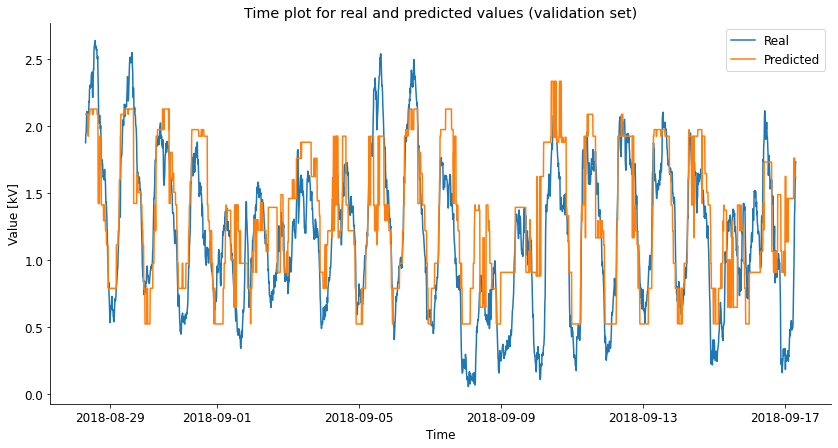

In [49]:
# Predict

harm_pred = X_eval.copy(deep=True)
harm_pred['target'] = y_eval
harm_pred['pred'] = model.predict(X_eval_scaled)

plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams.update({'font.size': 12})

# FULL PLOT
plt.title('Time plot for real and predicted values (validation set)')
sns.lineplot(data=harm_pred, x=harm_pred.index, y='target')
sns.lineplot(data=harm_pred, x=harm_pred.index, y='pred')
plt.legend(loc='upper right', labels=['Real', 'Predicted'])
plt.ylabel('Value [kV]')
plt.show()

### 6.c. SAVE MODEL

Save the model fo later use.

You can load the model using: ``model = pickle.load(open("model.sav", 'rb'))``

In [50]:
import pickle

filename='model.sav'
pickle.dump(model, open(filename,'wb'))

### References:

[1] Brownlee, J. (2016). *Machine Learning Mastery with Python: Understand Your Data, Create Accurate Models and Work Projects End-To-End*. (v1.4 ed.). Jason Brownlee.

[2] Skiena, S. S. (2017). *The Data Science Design Manual*. In Texts in Computer Science. Springer International Publishing. https://doi.org/10.1007/978-3-319-55444-0 

[3] Amr, T. (2020). *Hands-On Machine Learning with scikit-learn and Scientific Python Toolkits: A practical guide to implementing supervised and unsupervised machine learning algorithms in Python*. Packt Publishing, Limited.

[4] Igual, L., & Seguí, S. (2017). *Introduction to Data Science*. In Undergraduate Topics in Computer Science. Springer International Publishing. https://doi.org/10.1007/978-3-319-50017-1 

[5] Boucheron, B. & Tagliaferri,  L. (2019). *Python Machine Learning Projects*. Digital Ocean.

[6] Walker, M. (2020). *Python Data Cleaning Cookbook*. Packt Publishing Pvt Ltd.

[7] Galli, S. (2020). *Python Feature Engineering Cookbook*. Packt Publishing Pvt Ltd.

[8] McDaniel, P., & McLaughlin, S. (2009). *Security and Privacy Challenges in the Smart Grid. IEEE Security & Privacy Magazine*, 7(3), 75–77. doi:10.1109/msp.2009.76

[9] Majidpour, M., Qiu, C., Chu, P., Pota, H. R., & Gadh, R. (2016). *Forecasting the EV charging load based on customer profile or station measurement?* 163, 134–141. doi:10.1016/j.apenergy.2015.10.184

[10] Thorn, A. (Philosophy Tube). (2020, January 31). *Data | Philosophy Tube* [Video]. YouTube. https://www.youtube.com/watch?v=fCUTX1jurJ4&ab_channel=PhilosophyTube

[11] Linder-Norén, E. (2017). *ML-From-Scratch*. GitHub. https://github.com/eriklindernoren/ML-From-Scratch

[12] UN (United Nations) General Assembly. 2017. Resolution adopted by te General Assembly on 6 July 2017 -- *Work of the Statistical Commission pertaining to the 2030 Agenda for Sustainable Development*. Seventy-first session. A/RES/71/313. Available from https://undocs.org/A/RES/71/313 (accessed November 2021)

[13] Sweeney, L. (1997). *Weaving Technology and Policy Together to Maintain Confidentiality*. Journal of Law, Medicine & Ethics, 25(2–3), 98–110. doi:10.1111/j.1748-720x.1997.tb01885.x

[14] Yassine Himeur, Abdullah Alsalemi, Faycal Bensaali, & Abbes Amira (2020). *Robust event-based non-intrusive appliance recognition using multi-scale wavelet packet tree and ensemble bagging tree*. Applied Energy, 267, 114877.

[15] Wall Street Journal. (2021, October 5). *Watch Live: Facebook Whistleblower Frances Haugen Testifies | WSJ* [video]. YouTube. https://www.youtube.com/watch?v=GoSPmqqKams&ab_channel=WallStreetJournal

[16] Kramer, A. D. I., Guillory, J. E., & Hancock, J. T. (2014). *Experimental evidence of massive-scale emotional contagion through social networks*. Proceedings of the National Academy of Sciences, 111(24), 8788–8790. doi:10.1073/pnas.1320040111

[17] Verma, Inder M. (2014). *Editorial Expression of Concern: Experimental evidence of massivescale emotional contagion through social networks*. Proceedings of the National Academy of Sciences, 111(29), 10779–10779. doi:10.1073/pnas.1412469111

[18] Flick, C. (2015). *Informed consent and the Facebook emotional manipulation study*. Research Ethics, 12(1), 14–28. doi:10.1177/1747016115599568

[19] Wynants, L., Van Calster, B., Collins, G. S., Riley, R. D., Heinze, G., Schuit, E., … van Smeden, M. (2020). *Prediction models for diagnosis and prognosis of covid-19: systematic review and critical appraisal*. BMJ, m1328. doi:10.1136/bmj.m1328

[20] Douglas, W. (2021, July 30). *Hundreds of AI tools have been built to catch covid. None of them helped*. MIT Technology Review. https://www.technologyreview.com/2021/07/30/1030329/machine-learning-ai-failed-covid-hospital-diagnosis-pandemic/

[21] Starmer, J (StatQuest with Josh Starmer). (2018, September 17). *Machine Learning Fundamentals: Bias and Variance* [video]. YouTube. https://www.youtube.com/watch?v=EuBBz3bI-aA&ab_channel=StatQuestwithJoshStarmer

[22] Starmer, J (StatQuest with Josh Starmer). (2018, April 24). *Machine Learning Fundamentals: Cross Validation* [video]. YouTube. https://www.youtube.com/watch?v=fSytzGwwBVw&ab_channel=StatQuestwithJoshStarmer